In [23]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [24]:
df = pd.read_csv(r'card_transdata.csv')

df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [25]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [26]:
# VAMOS A HACER UN PAIR PLOT PARA VER SI LOS DATOS ESTÁN BIEN DIFERENCIADOS ENTRE CLASES.
# PARA MAYOR VELOCIDAD AL GRAFICAR, USAREMOS UN DF MUY PEQUEÑO.
# PARA ENTRENAR EL MODELO SE USARÁ UNO MÁS GRANDE
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.99,
                                                    random_state=0,
                                                    stratify=y)

In [27]:
x_train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
441031,0.327722,0.397348,1.166316,0.0,1.0,0.0,0.0
184484,1.683886,0.116861,0.506436,0.0,0.0,0.0,0.0
78369,7.607553,0.738888,0.761869,1.0,0.0,0.0,0.0
357263,1.108523,1.733618,3.671705,0.0,0.0,0.0,1.0
471837,0.850045,0.021737,9.588839,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
473047,28.553773,0.286084,0.059013,1.0,0.0,0.0,1.0
325546,20.812526,1.764239,1.547906,1.0,1.0,1.0,0.0
411113,26.769482,0.095623,0.967359,1.0,1.0,0.0,1.0
912904,60.198141,0.346715,1.455550,1.0,0.0,1.0,0.0


In [28]:
y_train.value_counts()

0.0    9126
1.0     874
Name: fraud, dtype: int64

In [29]:
# DE IGUAL FORMA, SE ESCALARÁN LOS DATOS PARA VISUALIZAR MEJOR EL PAIR PLOT.
ss = StandardScaler()
xscaled = pd.DataFrame(ss.fit_transform(x_train),columns = x_train.columns)
xscaled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,-0.410380,-0.246388,-0.238004,-2.720912,1.368782,-0.332963,-1.358289
1,-0.389187,-0.262087,-0.475042,-2.720912,-0.730577,-0.332963,-1.358289
2,-0.296616,-0.227271,-0.383287,0.367524,-0.730577,-0.332963,-1.358289
3,-0.398178,-0.171594,0.661967,-2.720912,-0.730577,-0.332963,0.736220
4,-0.402217,-0.267411,2.787483,-2.720912,1.368782,-0.332963,0.736220
...,...,...,...,...,...,...,...
9995,0.030717,-0.252615,-0.635763,0.367524,-0.730577,-0.332963,0.736220
9996,-0.090258,-0.169880,-0.100932,0.367524,1.368782,3.003338,-1.358289
9997,0.002834,-0.263276,-0.309473,0.367524,1.368782,-0.332963,0.736220
9998,0.525233,-0.249222,-0.134107,0.367524,-0.730577,3.003338,-1.358289


array([[<AxesSubplot: xlabel='distance_from_home', ylabel='distance_from_home'>,
        <AxesSubplot: xlabel='distance_from_last_transaction', ylabel='distance_from_home'>,
        <AxesSubplot: xlabel='ratio_to_median_purchase_price', ylabel='distance_from_home'>,
        <AxesSubplot: xlabel='repeat_retailer', ylabel='distance_from_home'>,
        <AxesSubplot: xlabel='used_chip', ylabel='distance_from_home'>,
        <AxesSubplot: xlabel='used_pin_number', ylabel='distance_from_home'>,
        <AxesSubplot: xlabel='online_order', ylabel='distance_from_home'>],
       [<AxesSubplot: xlabel='distance_from_home', ylabel='distance_from_last_transaction'>,
        <AxesSubplot: xlabel='distance_from_last_transaction', ylabel='distance_from_last_transaction'>,
        <AxesSubplot: xlabel='ratio_to_median_purchase_price', ylabel='distance_from_last_transaction'>,
        <AxesSubplot: xlabel='repeat_retailer', ylabel='distance_from_last_transaction'>,
        <AxesSubplot: xlabel='used_c

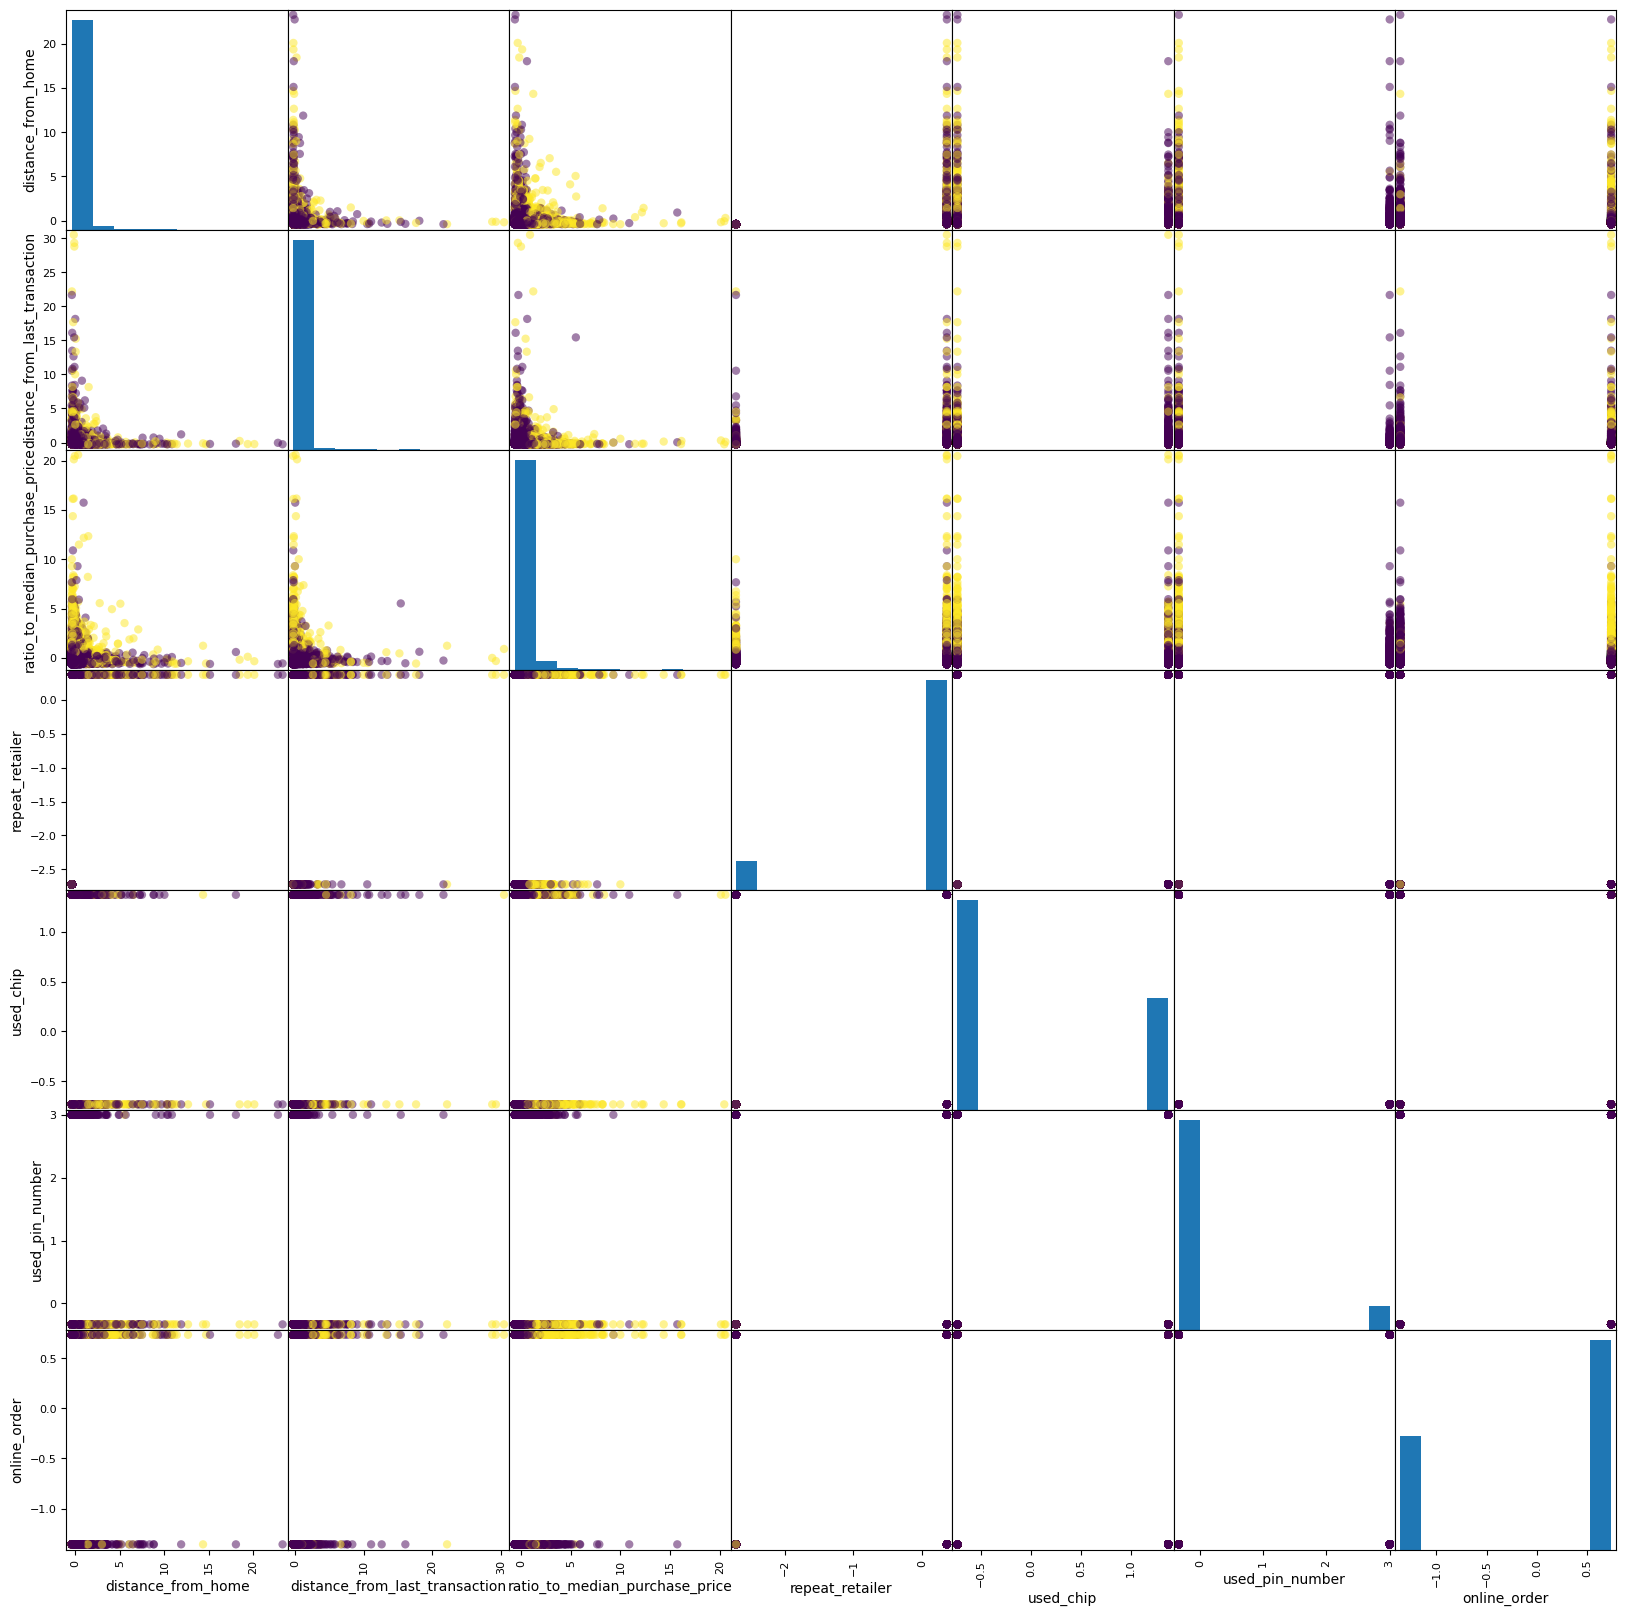

In [30]:
# LAS CLASES PARECEN ESTAR BIEN SEPARADAS PARA ALGUNAS VARIABLES POR LO QUE ES VIABLE HACER UN MODELO DE CLASIFICACIÓN.
pd.plotting.scatter_matrix(xscaled, c=y_train, figsize=(20,20),
                           marker='o', )

# CONTINUAMOS ANALIZANDO LOS DATOS, ESTA VEZ CON LA TOTALIDAD DE LOS MISMOS.

In [31]:
# Para saber cual es la proporción de la variable target
df.fraud.value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

In [32]:
# Para saber nulos 
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


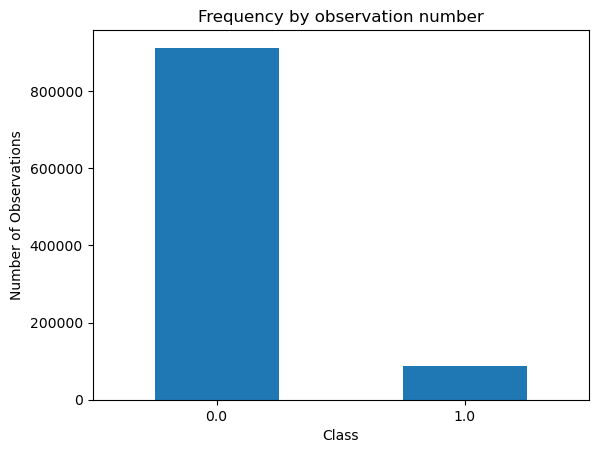

In [33]:
count_classes = pd.value_counts(df['fraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

# Propuestas 

1. Trabajar con dataset total. (1MM de registros, proporción variable target 90-10)
2. Seleccionar menor cantidad de registros y buscando una proporción de la variable target 70-30, para tener el datasets menos desbalanceado. Según cálculos , se debería extraer una muestra de 291343 datos totales. 


A partir de la selección del dataset: 

1. Aplicar los siguientes modelos sobre el conjunto de datos: 

   1.a. KNN. (Carlos)

   1.b. Naives Bayes. (Santiago)
   
   1.c. Regresión Logística. (moises) 

In [34]:
# Dataset de sólo no fraude 
df_nf = df.loc[df['fraud'] == 0]
df_nf.fraud.value_counts()
df_nf2 = df_nf.sample(203940, random_state=123)
print(df_nf2.fraud.value_counts())

# Generar otro dataset con los registros de fraude 
df_f = df.loc[df['fraud'] == 1]
df_f.fraud.value_counts()


0.0    203940
Name: fraud, dtype: int64


1.0    87403
Name: fraud, dtype: int64

In [35]:
definitivo = pd.merge(df_nf2, df_f, how = 'outer')
definitivo.fraud.value_counts()

display(definitivo.sample(10))

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
168802,3.202658,3.282707,0.908250,1.0,0.0,0.0,1.0,0.0
109132,4.344789,0.187510,0.278095,1.0,0.0,0.0,0.0,0.0
22005,15.088486,0.218026,0.267309,1.0,0.0,1.0,0.0,0.0
229738,23.869503,7.123836,4.575248,1.0,0.0,0.0,1.0,1.0
245619,10.352541,0.862526,4.268413,1.0,1.0,0.0,1.0,1.0
43984,79.181195,1.740963,1.549649,1.0,0.0,0.0,0.0,0.0
273373,31.841191,0.463281,22.974045,1.0,1.0,0.0,1.0,1.0
259963,22.630776,0.878491,5.300961,1.0,1.0,0.0,1.0,1.0
192459,56.116598,1.925772,1.065379,1.0,1.0,0.0,0.0,0.0
252869,6.203736,0.260443,7.192754,1.0,1.0,0.0,1.0,1.0


# NAIVE BAYES (TODOS LOS DATOS)

In [36]:
# VOLVEMOS A SEPARAR EN TRAIN Y TEST PERO ESTA VEZ
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=123,
                                                    stratify=y)

In [37]:
model1 = GaussianNB()
model1.fit(x_train, y_train);                                                  

In [38]:
model2 = MultinomialNB()
model2.fit(x_train, y_train)

MultinomialNB()

In [39]:
y_pred_gnb = model1.predict(x_test)
y_pred_mnb = model2.predict(x_test)

In [40]:
print (f'Accuracy para modelo gaussiano: {accuracy_score(y_pred_gnb,y_test)}')
print (f'Accuracy para modelo multinomial: {accuracy_score(y_pred_mnb,y_test)}')
print()
print (f'Recall para modelo gaussiano: {recall_score(y_test,y_pred_gnb)}')
print (f'Recall para modelo multinomial: {recall_score(y_test,y_pred_mnb)}')


Accuracy para modelo gaussiano: 0.951948
Accuracy para modelo multinomial: 0.9204

Recall para modelo gaussiano: 0.5998810123106494
Recall para modelo multinomial: 0.29321312525742527


Text(0.5, 1.0, 'GaussianNB')

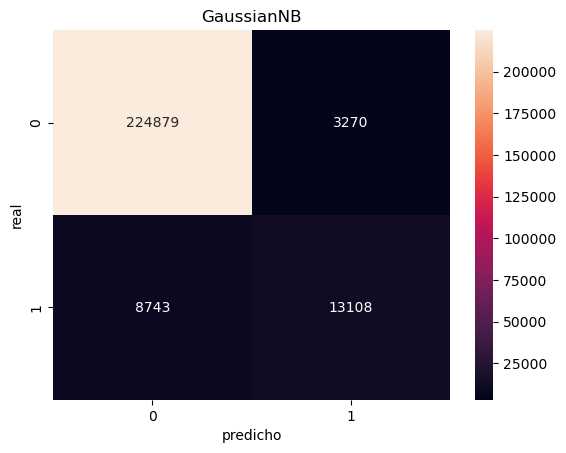

In [41]:
g = sns.heatmap(confusion_matrix(y_test,model1.predict(x_test)),annot=True, fmt='.0f')
g.set_xlabel('predicho')
g.set_ylabel('real')
g.set_title('GaussianNB')

In [ ]:
print(classification_report(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_mnb))

Text(0.5, 1.0, 'MultinomialNB')

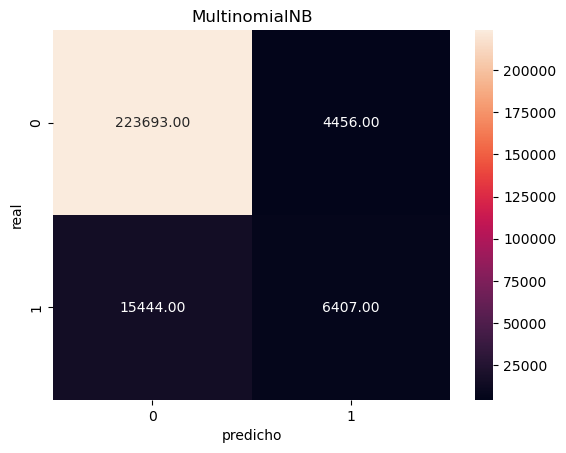

In [42]:
g = sns.heatmap(confusion_matrix(y_test,model2.predict(x_test)),annot=True, fmt='.2f')
g.set_xlabel('predicho')
g.set_ylabel('real')
g.set_title('MultinomialNB')

In [44]:
print(classification_report(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_mnb))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97    228149
         1.0       0.80      0.60      0.69     21851

    accuracy                           0.95    250000
   macro avg       0.88      0.79      0.83    250000
weighted avg       0.95      0.95      0.95    250000



# NAIVE BAYES (BALANCEADO)

In [ ]:
X = definitivo.iloc[:, 0:-1]
y = definitivo.iloc[:, -1]


x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=123,
                                                    stratify=y)

In [ ]:
model1 = GaussianNB()
model1.fit(x_train, y_train);  

In [ ]:
model2 = MultinomialNB()
model2.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred_gnb = model1.predict(x_test)
y_pred_mnb = model2.predict(x_test)

In [ ]:
print (f'Accuracy para modelo gaussiano: {accuracy_score(y_pred_gnb,y_test)}')
print (f'Accuracy para modelo multinomial: {accuracy_score(y_pred_mnb,y_test),}')
print()
print (f'Recall para modelo gaussiano: {recall_score(y_test,y_pred_gnb)}')
print (f'Recall para modelo multinomial: {recall_score(y_test,y_pred_mnb)}')

Accuracy para modelo gaussiano: 0.9532785984952497
Accuracy para modelo multinomial: (0.8463259926410017,)

Recall para modelo gaussiano: 0.9169832044300033
Recall para modelo multinomial: 0.6412978811038397


Text(0.5, 1.0, 'GaussianNB')

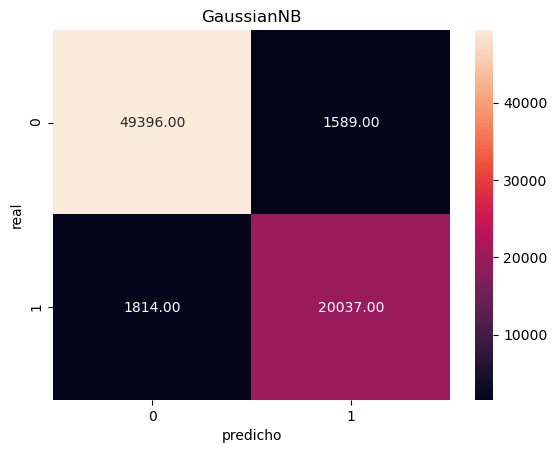

In [ ]:
g = sns.heatmap(confusion_matrix(y_test,model1.predict(x_test)),annot=True, fmt='.2f')
g.set_xlabel('predicho')
g.set_ylabel('real')
g.set_title('GaussianNB')

In [45]:
print(classification_report(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_mnb))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97    228149
         1.0       0.80      0.60      0.69     21851

    accuracy                           0.95    250000
   macro avg       0.88      0.79      0.83    250000
weighted avg       0.95      0.95      0.95    250000

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96    228149
         1.0       0.59      0.29      0.39     21851

    accuracy                           0.92    250000
   macro avg       0.76      0.64      0.67    250000
weighted avg       0.91      0.92      0.91    250000



Text(0.5, 1.0, 'MultinomialNB')

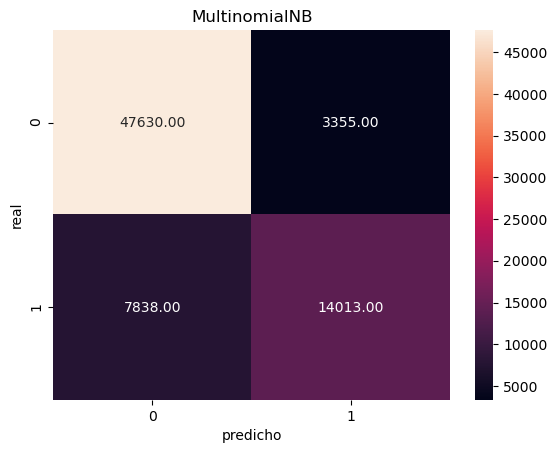

In [ ]:
g = sns.heatmap(confusion_matrix(y_test,model2.predict(x_test)),annot=True, fmt='.2f')
g.set_xlabel('predicho')
g.set_ylabel('real')
g.set_title('MultinomialNB')

In [ ]:
print(classification_report(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_mnb))